In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from IPython.display import Image
import os
import pydotplus

Test=pd.read_csv('./data/Test.csv')
Test=Test[Test['A']=='v']
Test

,State,A,Unnamed: 2,Region,Politics,Gun_ownership,Traffic,Misdemeanor_sentence_aver,Misdemeanor_sentence_sub,Felony_sentence_aver,...,Crimes,Misdemeanor_Rate,Misdemeanor_Result,MSA_Rate,Felony_Result,Traveler_spending,older_rate,Female_Rate,Police_area,Police_Rate
16,Alabama,v,AL,south,trump,50.0,1.0,7.0,9.0,402.000,...,3360.9,36.0,1209.924,75.183294,2150.976,11513.8,17.4,51.7,0.617114,2.2
17,Arizona,v,AZ,west,biden,37.0,1.0,3.7,5.0,246.000,...,3168.2,80.0,2534.560,95.153404,633.640,21582.8,18.0,50.3,1.640300,1.8
18,California,v,CA,west,biden,18.0,0.0,9.0,6.0,333.600,...,2833.7,80.0,2266.960,97.881146,566.740,148446.9,14.8,50.3,2.119850,2.0
19,Connecticut,v,CT,northeast,biden,18.0,0.0,5.5,11.0,315.000,...,1871.5,81.0,1515.915,94.941978,355.585,12231.5,17.6,51.2,0.068367,2.1
20,Florida,v,FL,south,trump,29.0,0.0,7.0,10.0,447.000,...,2673.7,75.0,2005.275,96.784140,668.425,102843.7,20.9,51.1,0.810971,2.1
21,Idaho,v,ID,west,trump,53.0,0.0,6.0,6.0,936.000,...,1714.8,78.0,1337.544,74.284112,377.256,5656.0,16.2,49.9,1.352788,1.6
22,Illinois,v,IL,midwest,biden,24.0,0.0,6.3,11.0,240.000,...,2350.2,71.0,1668.642,88.753778,681.558,41750.0,16.1,50.9,0.714276,2.1
23,Iowa,v,IA,midwest,trump,38.0,0.0,12.3,21.0,417.000,...,2074.8,83.0,1722.084,61.267325,352.716,9210.9,17.5,50.2,0.971620,1.5
24,Kansas,v,KS,midwest,trump,43.0,1.0,6.3,11.0,396.750,...,3102.0,51.0,1582.020,69.537956,1519.980,8133.0,16.4,50.2,0.968618,2.2
25,Kentucky,v,KY,south,trump,49.0,0.0,7.5,9.0,402.000,...,2218.2,68.0,1508.376,58.511802,709.824,10211.7,16.9,50.7,0.615641,1.7


In [19]:
mis_Data=pd.DataFrame({'Misdemeanor_Result':Test['Misdemeanor_Result'],'area_police':Test['Police_area'],\
                       'Penalty':Test['GDP_penalty'],'travel':Test['Traveler_spending'],'Temper':Test['Temper'],\
                      'GDP':Test['GDP'],'MSA':Test['MSA_Rate'],'Happy':Test['Happy'],'Gun':Test['Gun_ownership'],\
                      'PCPI':Test['PCPI'],'Gender':Test['Female_Rate'],'old_rate':Test['older_rate'],'Education':Test['Education']})

mis_x=mis_Data[['area_police','Penalty','travel','Temper','GDP','MSA','Happy','Gun','PCPI','Gender','old_rate','Education']]
mis_y=mis_Data['Misdemeanor_Result']

mis_x_train,mis_x_test,mis_y_train,mis_y_test=train_test_split(mis_x,mis_y)

mis_rnd_clf=DecisionTreeRegressor()
mis_rnd_clf.fit(mis_x_train,mis_y_train)

DecisionTreeRegressor()

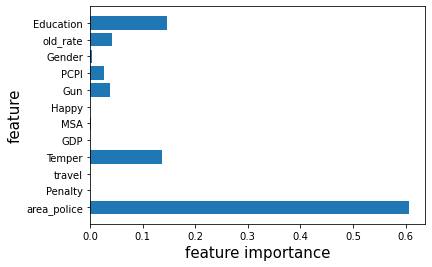

In [20]:
feature_imp = mis_rnd_clf.feature_importances_
idx = np.arange(mis_x.shape[1])

plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, mis_x.columns)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

In [21]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [23]:
from sklearn.tree import export_graphviz  

mis_dt_dot_data = tree.export_graphviz(mis_rnd_clf, out_file = None, feature_names = mis_Data.columns[1:])
    
mis_pydot_graph = pydotplus.graph_from_dot_data(mis_dt_dot_data)
# Image(mis_pydot_graph.create_png())

In [52]:
fel_Data=pd.DataFrame({'Felony_Result':Test['Felony_Result'],'area_police':Test['Police_area'],\
                       'Penalty':Test['Felony_sentence_aver'],'travel':Test['Traveler_spending'],'Temper':Test['Temper'],\
                      'GDP':Test['GDP'],'MSA':Test['MSA_Rate'],'Happy':Test['Happy'],'Gun':Test['Gun_ownership'],\
                      'PCPI':Test['PCPI'],'Gender':Test['Female_Rate'],'old_rate':Test['older_rate'],'Education':Test['Education']})

fel_x=mis_Data[['area_police','Penalty','travel','Temper','GDP','MSA','Happy','Gun','PCPI','Gender','old_rate','Education']]
fel_y=fel_Data['Felony_Result']

fel_x_train,fel_x_test,fel_y_train,fel_y_test=train_test_split(fel_x,fel_y)

fel_rnd_clf=DecisionTreeRegressor()
fel_rnd_clf.fit(fel_x_train,fel_y_train)

DecisionTreeRegressor()

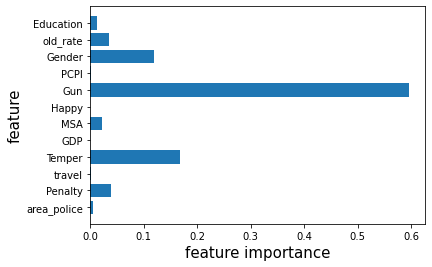

In [53]:
feature_imp = fel_rnd_clf.feature_importances_
idx = np.arange(fel_x.shape[1])

plt.barh(idx, feature_imp, align='center')
plt.yticks(idx, fel_x.columns)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

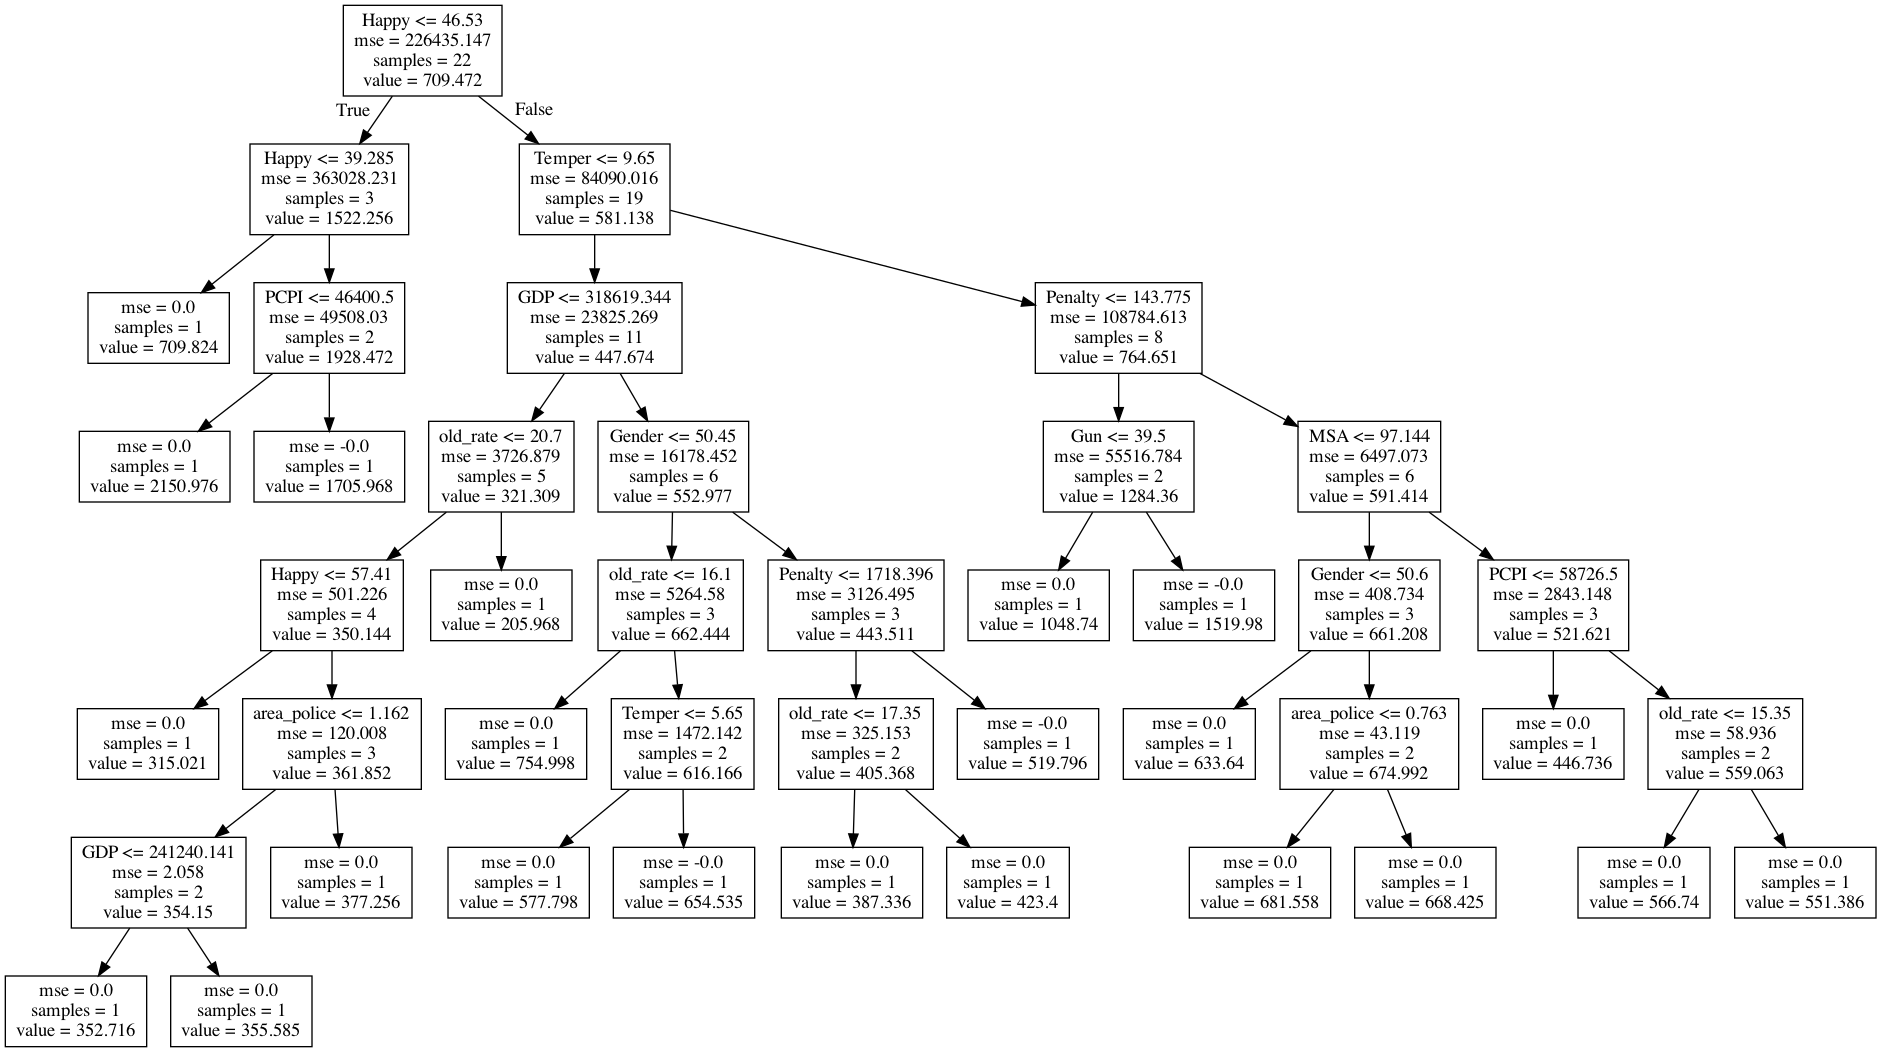

In [16]:
fel_dt_dot_data = tree.export_graphviz(fel_rnd_clf, out_file = None, feature_names = fel_Data.columns[1:])
    
fel_pydot_graph = pydotplus.graph_from_dot_data(fel_dt_dot_data)
Image(fel_pydot_graph.create_png())